# Librerías

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import warnings
warnings.filterwarnings('ignore')
#Librerias basicas para proyecciones
from statsmodels.tsa.api import SimpleExpSmoothing
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters.model import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters.model import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pmdarima import auto_arima
import os
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)
import warnings
warnings.filterwarnings('ignore')
import arch
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import xgboost as xgb
from sklearn.metrics import mean_squared_error
%matplotlib inline
plt.style.use("classic")
plt.rcParams['figure.facecolor'] = 'white'

## Cargamos los datos 

In [3]:
datos = pd.read_excel('base_datos_final_hh.xlsx')

### Arreglamos los datos originales 

In [4]:
datos.drop("ConsumoCombustibleFFijas", axis = 1, inplace = True )

In [5]:
index = pd.Index(sm.tsa.datetools.dates_from_range("2016M1", "2022M12"))    
datos.set_index(index, inplace=True)

In [6]:
datos["Fecha"] = datos.index

In [7]:
datos.drop("Unnamed: 0", axis = 1, inplace=True)

In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2016-01-31 to 2022-12-31
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ConsumoAguaM3               84 non-null     int64         
 1   ConsumoEnergíaKWh           84 non-null     float64       
 2   ConsumoPapelResmasMes       84 non-null     float64       
 3   ConsumoCombustibleFMóviles  84 non-null     float64       
 4   Fecha                       84 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 3.9 KB


In [9]:
datos

,ConsumoAguaM3,ConsumoEnergíaKWh,ConsumoPapelResmasMes,ConsumoCombustibleFMóviles,Fecha
2016-01-31,9258,520258.0,596.125148,10818.640000,2016-01-31
2016-02-29,13633,525991.0,1007.105473,28693.320000,2016-02-29
2016-03-31,16603,692349.0,830.000000,35695.960000,2016-03-31
2016-04-30,17846,711904.0,2115.000000,44776.620000,2016-04-30
2016-05-31,17274,755482.0,251.000000,31995.100000,2016-05-31
...,...,...,...,...,...
2022-08-31,14962,599443.6,204.000000,17292.932198,2022-08-31
2022-09-30,17862,714349.6,39.000000,28996.572752,2022-09-30
2022-10-31,21897,704331.0,632.000000,29131.706855,2022-10-31
2022-11-30,17880,734474.0,2360.000000,29696.358471,2022-11-30


In [10]:
consumo_agua_2017 = datos["ConsumoAguaM3"].loc["2017-01-31":"2017-12-31"]
consumo_agua_2018 = datos["ConsumoAguaM3"].loc["2018-01-31":"2018-12-31"]
consumo_agua_2019 = datos["ConsumoAguaM3"].loc["2019-01-31":"2019-12-31"]
consumo_agua_2020 = datos["ConsumoAguaM3"].loc["2020-01-31":"2020-12-31"]
consumo_agua_2021 = datos["ConsumoAguaM3"].loc["2021-01-31":"2021-12-31"]
consumo_agua_2022 = datos["ConsumoAguaM3"].loc["2022-01-31":"2022-12-31"]

In [11]:
consumo_ener_2017 = datos["ConsumoEnergíaKWh"].loc["2017-01-31":"2017-12-31"]/277.77*22
consumo_ener_2018 = datos["ConsumoEnergíaKWh"].loc["2018-01-31":"2018-12-31"]/277.77*22
consumo_ener_2019 = datos["ConsumoEnergíaKWh"].loc["2019-01-31":"2019-12-31"]/277.77*22
consumo_ener_2020 = datos["ConsumoEnergíaKWh"].loc["2020-01-31":"2020-12-31"]/277.77*22
consumo_ener_2021 = datos["ConsumoEnergíaKWh"].loc["2021-01-31":"2021-12-31"]/277.77*22
consumo_ener_2022 = datos["ConsumoEnergíaKWh"].loc["2022-01-31":"2022-12-31"]/277.77*22

In [12]:
consumo_papel_2017 = datos["ConsumoPapelResmasMes"].loc["2017-01-31":"2017-12-31"]*5
consumo_papel_2018 = datos["ConsumoPapelResmasMes"].loc["2018-01-31":"2018-12-31"]*5
consumo_papel_2019 = datos["ConsumoPapelResmasMes"].loc["2019-01-31":"2019-12-31"]*5
consumo_papel_2020 = datos["ConsumoPapelResmasMes"].loc["2020-01-31":"2020-12-31"]*5
consumo_papel_2021 = datos["ConsumoPapelResmasMes"].loc["2021-01-31":"2021-12-31"]*5
consumo_papel_2022 = datos["ConsumoPapelResmasMes"].loc["2022-01-31":"2022-12-31"]*5

In [13]:
consumo_combus_2017 = datos["ConsumoCombustibleFMóviles"].loc["2017-01-31":"2017-12-31"]*0.05
consumo_combus_2018 = datos["ConsumoCombustibleFMóviles"].loc["2018-01-31":"2018-12-31"]*0.05
consumo_combus_2019 = datos["ConsumoCombustibleFMóviles"].loc["2019-01-31":"2019-12-31"]*0.05
consumo_combus_2020 = datos["ConsumoCombustibleFMóviles"].loc["2020-01-31":"2020-12-31"]*0.05
consumo_combus_2021 = datos["ConsumoCombustibleFMóviles"].loc["2021-01-31":"2021-12-31"]*0.05
consumo_combus_2022 = datos["ConsumoCombustibleFMóviles"].loc["2022-01-31":"2022-12-31"]*0.05

In [34]:
total_2017 = 32298
total_2018 = 31438
total_2019 = 31095
total_2020 = 23715
total_2021 = 23458
total_2022 = 23899

In [35]:
personal_2017 = 3622
personal_2018 = 3962
personal_2019 = 4023
personal_2020 = 3600
personal_2021 = 3603
personal_2022 = 3555

In [36]:
hh_2017 = consumo_agua_2017 + consumo_ener_2017 + consumo_papel_2017 + consumo_combus_2017
hh_2018 = consumo_agua_2018 + consumo_ener_2018 + consumo_papel_2018 + consumo_combus_2018
hh_2019 = consumo_agua_2019 + consumo_ener_2019 + consumo_papel_2019 + consumo_combus_2019
hh_2020 = consumo_agua_2020 + consumo_ener_2020 + consumo_papel_2020 + consumo_combus_2020
hh_2021 = consumo_agua_2021 + consumo_ener_2021 + consumo_papel_2021 + consumo_combus_2021
hh_2022 = consumo_agua_2022 + consumo_ener_2022 + consumo_papel_2022 + consumo_combus_2022

In [37]:
datos_prospectivos = pd.concat([hh_2017,hh_2018 , hh_2019 , hh_2020 , hh_2021 , hh_2022], ignore_index = False)

In [38]:
datos_prospectivos

2017-01-31    57240.482897
2017-02-28    69748.576081
2017-03-31    78677.957077
2017-04-30    85913.906291
2017-05-31    76115.568740
                  ...     
2022-08-31    64323.909093
2022-09-30    76084.901144
2022-10-31    82298.162511
2022-11-30    89336.787539
2022-12-31    73454.524090
Length: 72, dtype: float64

In [39]:
datos_prospectivos = pd.DataFrame(datos_prospectivos)

In [40]:
datos_prospectivos = datos_prospectivos.rename(columns={0: 'HH_mensual'})

In [41]:
datos_prospectivos

,HH_mensual
2017-01-31,57240.482897
2017-02-28,69748.576081
2017-03-31,78677.957077
2017-04-30,85913.906291
2017-05-31,76115.568740
...,...
2022-08-31,64323.909093
2022-09-30,76084.901144
2022-10-31,82298.162511
2022-11-30,89336.787539


## Prospección

Serie de tiempo

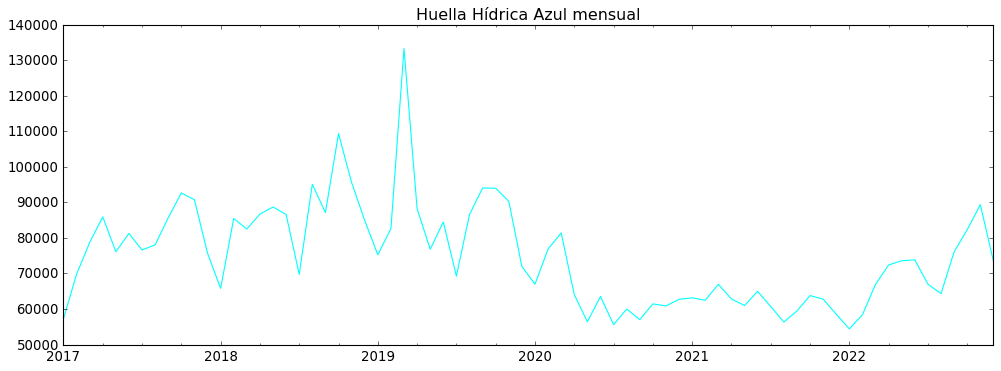

In [125]:
datos_prospectivos["HH_mensual"].plot(style='-',
        figsize=(15, 5),
        color="cyan",
        title='Huella Hídrica Azul mensual')
plt.show()

Histograma

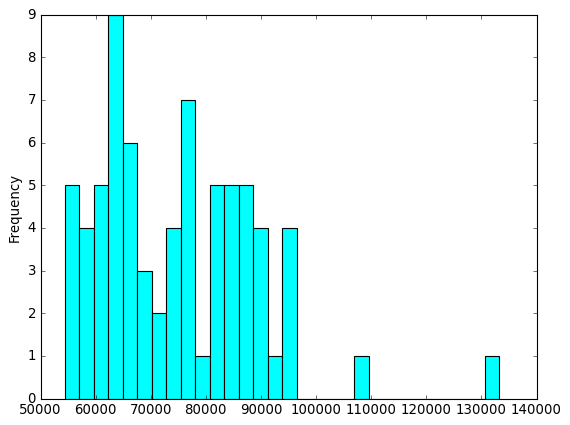

In [128]:
datos_prospectivos["HH_mensual"].plot(kind='hist', bins = 30, color = "cyan")
plt.show()

In [129]:
datos_prospectivos.index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
      

In [130]:
datos_prospectivos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2017-01-31 to 2022-12-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HH_mensual  72 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


Divido entre train and test

In [131]:
train = datos_prospectivos.loc[datos_prospectivos.index < '01-01-2021']
test = datos_prospectivos.loc[datos_prospectivos.index >= '01-01-2021']

In [132]:
train

,HH_mensual
2017-01-31,57240.482897
2017-02-28,69748.576081
2017-03-31,78677.957077
2017-04-30,85913.906291
2017-05-31,76115.568740
2017-06-30,81248.098196
2017-07-31,76610.071938
2017-08-31,78032.395326
2017-09-30,85636.791997
2017-10-31,92639.316463


In [133]:
test

,HH_mensual
2021-01-31,63139.557485
2021-02-28,62474.190365
2021-03-31,66942.671837
2021-04-30,62820.488501
2021-05-31,60973.059772
2021-06-30,64973.752338
2021-07-31,60660.399372
2021-08-31,56345.496830
2021-09-30,59448.800041
2021-10-31,63772.781650


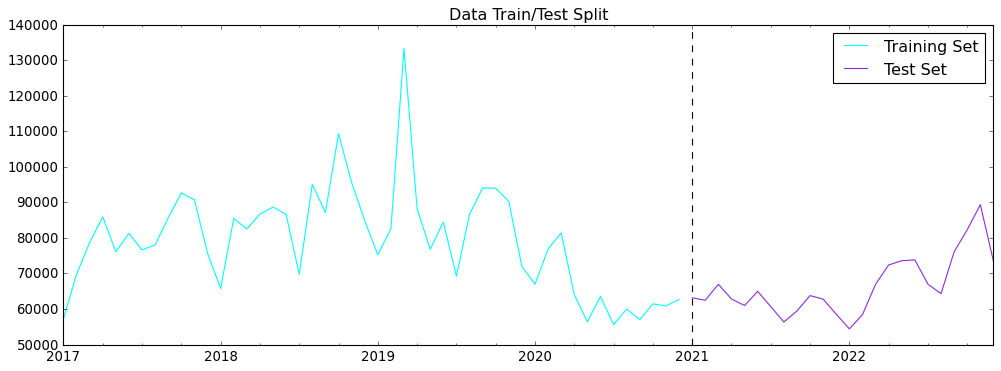

In [135]:
fig, ax = plt.subplots(figsize=(15, 5))
train["HH_mensual"].plot(ax=ax, label='Training Set', title='Data Train/Test Split', color = "cyan")
test["HH_mensual"].plot(ax=ax, label='Test Set', color = "blueviolet")
ax.axvline('01-01-2021', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [136]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=3, test_size=12, gap=2)
datos = datos.sort_index()

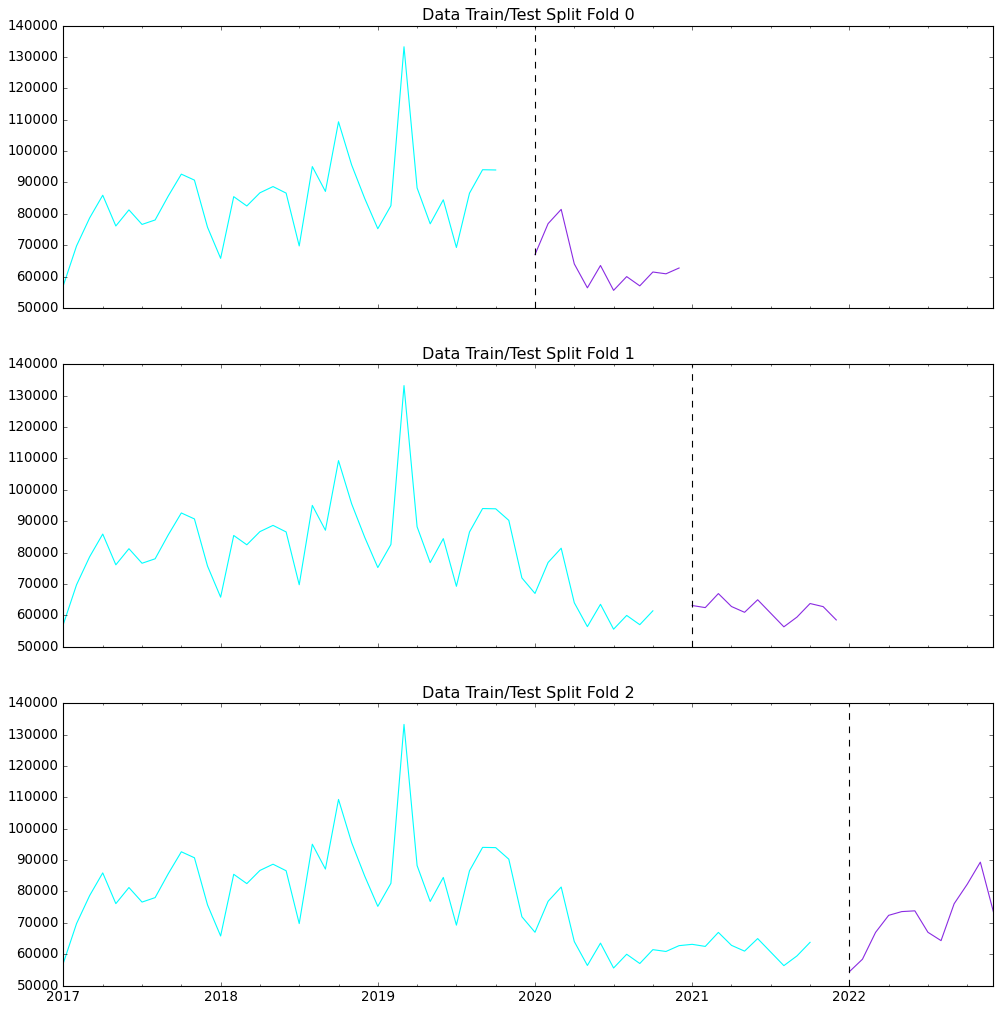

In [137]:
fig, axs = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(datos_prospectivos):
    train = datos_prospectivos.iloc[train_idx]
    test = datos_prospectivos.iloc[val_idx]
    train['HH_mensual'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}',
                          color = "cyan")
    test['HH_mensual'].plot(ax=axs[fold],
                         label='Test Set',
                         color = "blueviolet")
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

Creo predeterminadas en base al tiempo

In [138]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    return df

df = create_features(datos_prospectivos)

Creo una predeterminada que es la misma serie pero con una diferencia de primer orden

In [139]:
df["HH_Mensual_dif"] = df["HH_mensual"].diff()

In [140]:
tss = TimeSeriesSplit(n_splits=3, test_size=12, gap=2)
df = df.sort_index()
1

fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = [ 'quarter', 'month','year', "HH_Mensual_dif"]
    TARGET = 'HH_mensual'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[17:49:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:84606.41825	validation_1-rmse:63535.55108
[100]	validation_0-rmse:33910.50725	validation_1-rmse:13403.54652
[195]	validation_0-rmse:16047.42654	validation_1-rmse:11012.04525
[17:49:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:80450.01813	validation_1-rmse:61186.69241
[100]	validation_0-rmse:32324.38055	validation_1-rmse:20089.28172
[200]	validation_0-rmse:14818.28487	validation_1-rmse:5311.51771
[300]	validation_0-rmse:8262.79753	validation_1-rmse:2406.54921
[322]	validation_0-rmse:7484.77791	validation_1-rmse:2838.68712
[17:49:26] WARNING:

In [141]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 7299.2355
Fold scores:[7975.318662292232, 2087.7585013246726, 11834.629390509146]


In [142]:
# Retrain on all data
df = create_features(df)

FEATURES = ['quarter', 'month', 'year', "HH_Mensual_dif"]
TARGET = 'HH_mensual'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=1000,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

[17:49:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:75528.58136
[100]	validation_0-rmse:29961.78534
[200]	validation_0-rmse:13572.41499
[300]	validation_0-rmse:7769.29592
[400]	validation_0-rmse:5730.04400
[500]	validation_0-rmse:4941.84065
[600]	validation_0-rmse:4335.66407
[700]	validation_0-rmse:3796.35974
[800]	validation_0-rmse:3400.28223
[900]	validation_0-rmse:3183.71764
[999]	validation_0-rmse:2922.49657


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

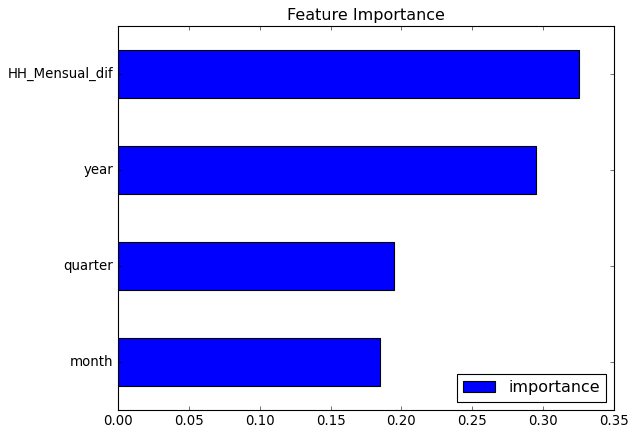

In [143]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [144]:
df.index.max()

Timestamp('2022-12-31 00:00:00')

In [145]:
df

,HH_mensual,quarter,month,year,HH_Mensual_dif
2017-01-31,57240.482897,1,1,2017,NaN
2017-02-28,69748.576081,1,2,2017,12508.093184
2017-03-31,78677.957077,1,3,2017,8929.380996
2017-04-30,85913.906291,2,4,2017,7235.949214
2017-05-31,76115.568740,2,5,2017,-9798.337551
...,...,...,...,...,...
2022-08-31,64323.909093,3,8,2022,-2648.427447
2022-09-30,76084.901144,3,9,2022,11760.992050
2022-10-31,82298.162511,4,10,2022,6213.261367
2022-11-30,89336.787539,4,11,2022,7038.625028


In [146]:
# Create future dataframe
future = pd.date_range('2023-01-31','2023-12-31',freq='M')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])
#df_and_future = add_lags(df_and_future)

In [147]:
df_and_future

,HH_mensual,quarter,month,year,HH_Mensual_dif,isFuture
2017-01-31,57240.482897,1.0,1.0,2017.0,NaN,False
2017-02-28,69748.576081,1.0,2.0,2017.0,12508.093184,False
2017-03-31,78677.957077,1.0,3.0,2017.0,8929.380996,False
2017-04-30,85913.906291,2.0,4.0,2017.0,7235.949214,False
2017-05-31,76115.568740,2.0,5.0,2017.0,-9798.337551,False
...,...,...,...,...,...,...
2023-08-31,NaN,NaN,NaN,NaN,NaN,True
2023-09-30,NaN,NaN,NaN,NaN,NaN,True
2023-10-31,NaN,NaN,NaN,NaN,NaN,True
2023-11-30,NaN,NaN,NaN,NaN,NaN,True


In [148]:
df_and_future = create_features(df_and_future)

In [149]:
future_w_features = df_and_future.query('isFuture').copy()

In [150]:
future_w_features

,HH_mensual,quarter,month,year,HH_Mensual_dif,isFuture
2023-01-31,NaN,1,1,2023,NaN,True
2023-02-28,NaN,1,2,2023,NaN,True
2023-03-31,NaN,1,3,2023,NaN,True
2023-04-30,NaN,2,4,2023,NaN,True
2023-05-31,NaN,2,5,2023,NaN,True
2023-06-30,NaN,2,6,2023,NaN,True
2023-07-31,NaN,3,7,2023,NaN,True
2023-08-31,NaN,3,8,2023,NaN,True
2023-09-30,NaN,3,9,2023,NaN,True
2023-10-31,NaN,4,10,2023,NaN,True


In [151]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

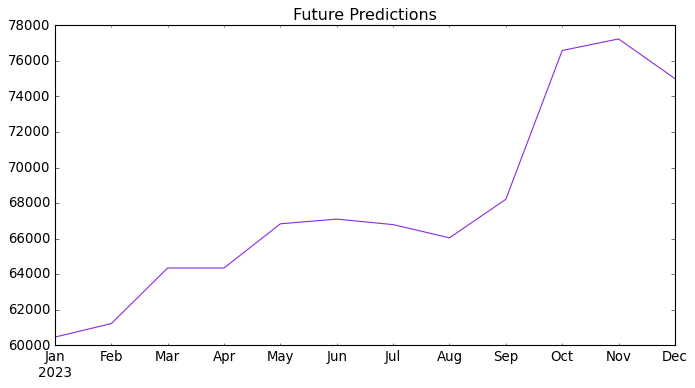

In [152]:
future_w_features['pred'].plot(figsize=(10, 5),
                               color="blueviolet",
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()


In [153]:
test['prediction'] = reg.predict(X_test)

In [154]:
train['prediction'] = reg.predict(X_train)

In [155]:
df_and_future['HH_mensual'].std()

14323.347264756541

In [156]:
df_and_future['HH_mensual'].mean()

74917.95870787188

In [157]:
lim_inf_df_and_future_HH_mensual = 74917.95870787188 - 1.96*14323.347264756541
lim_sup_df_and_future_HH_mensual = 74917.95870787188 + 1.96*14323.347264756541

In [158]:
fecha_inicio = pd.to_datetime('2017-01-31')
fecha_fin = pd.to_datetime('2022-12-31')

In [159]:
x_start_df_fu = (fecha_inicio - df_and_future.index.min()) / pd.Timedelta(days=1)
x_end_df_fu = (fecha_fin - df_and_future.index.min()) / pd.Timedelta(days=1)

In [160]:
x_end_df_fu

2160.0

In [161]:
future_w_features["pred"].mean()

67851.31

In [162]:
future_w_features["pred"].std()

5596.87841796875

In [163]:
lim_inf_future_w_features_pred = 67851.31 - 1.96*5596.87841796875
lim_sup_future_w_features_pred = 67851.31 + 1.96*5596.87841796875

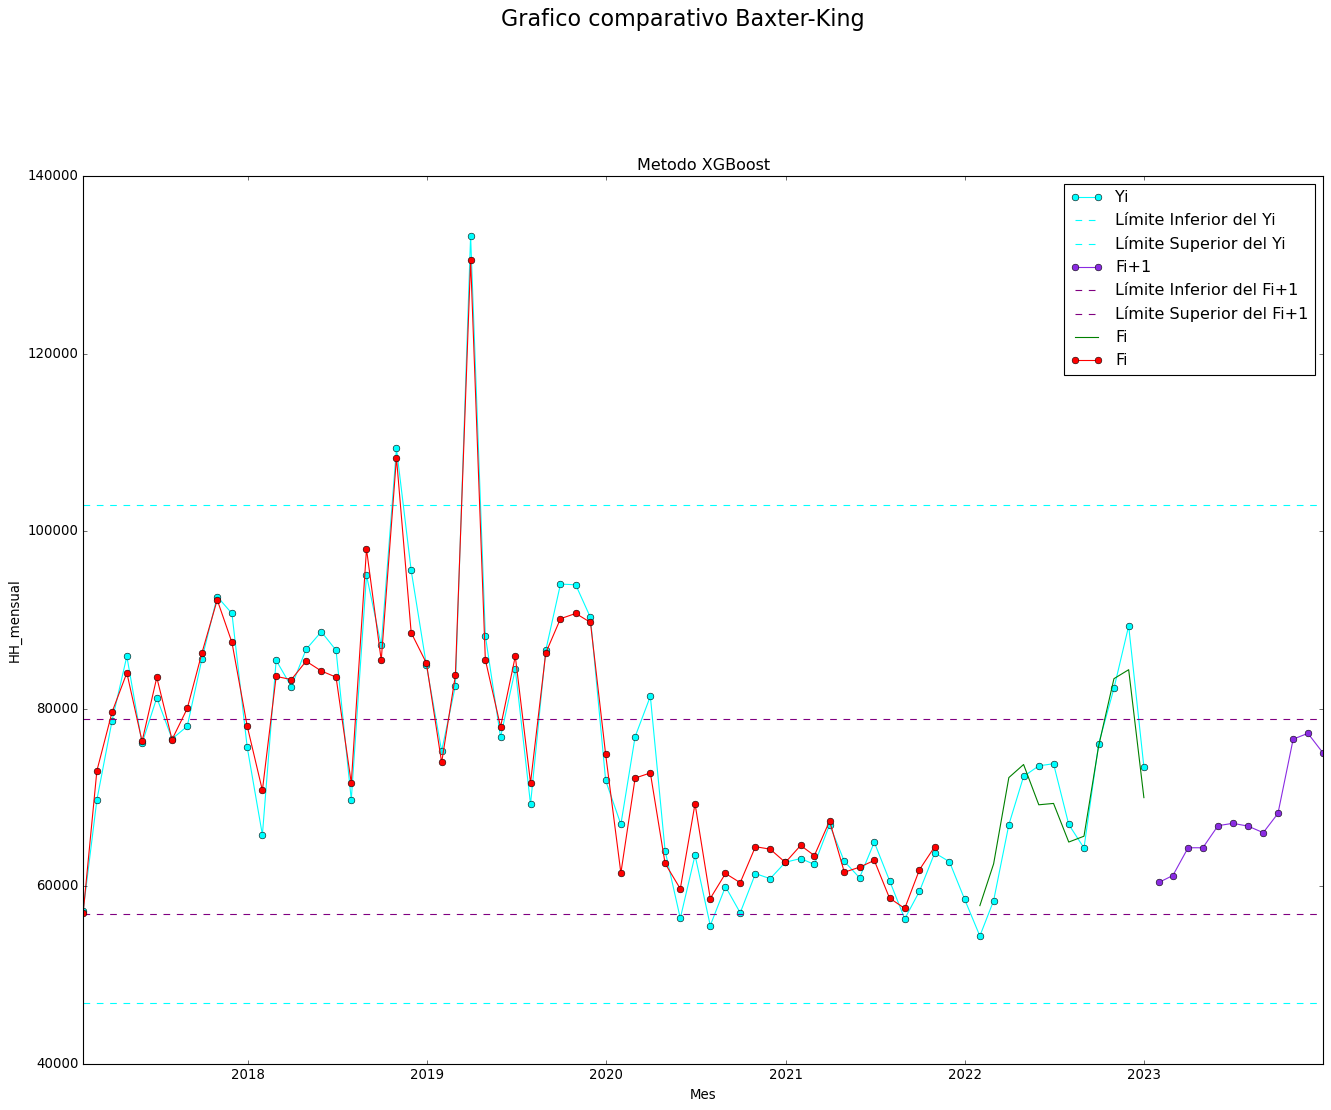

In [195]:
fig, (ax1) = plt.subplots(1,1, figsize = (20,15))
fig.suptitle('Grafico comparativo Baxter-King', fontsize =20)

# simple
ax1.plot( df_and_future['HH_mensual'], '-o',  color = 'cyan', label = 'Yi')
ax1.axhline(lim_inf_df_and_future_HH_mensual, color='cyan', linestyle='--', label='Límite Inferior del Yi')
ax1.axhline(lim_sup_df_and_future_HH_mensual, color='cyan', linestyle='--', label='Límite Superior del Yi')
ax1.plot(future_w_features.index, future_w_features["pred"],'-o',  color = 'blueviolet', label = 'Fi+1')
ax1.axhline(lim_inf_future_w_features_pred, color='purple', linestyle='--', label='Límite Inferior del Fi+1')
ax1.axhline(lim_sup_future_w_features_pred, color='purple', linestyle='--', label='Límite Superior del Fi+1')

ax1.plot( test["prediction"],'-',  color = 'green', label = 'Fi')
ax1.plot( train["prediction"],'-o',  color = 'red', label = 'Fi')
ax1.set(xlabel= 'Mes', ylabel= "HH_mensual")
ax1.set_title('Metodo XGBoost')
ax1.legend(loc='best')

plt.subplots_adjust(top=0.84)

plt.show()

In [194]:
future_w_features["pred"].sum()

814215.75

In [165]:
completo = pd.concat([df_and_future['HH_mensual'], future_w_features["pred"]], ignore_index = True)

In [166]:
completo = pd.DataFrame(completo.dropna())

In [167]:
completo.set_index(df_and_future.index, inplace = True)

In [168]:
completo[0].loc["2017-01-31":"2017-12-31"].sum()

948304.7880042917

<Axes: >

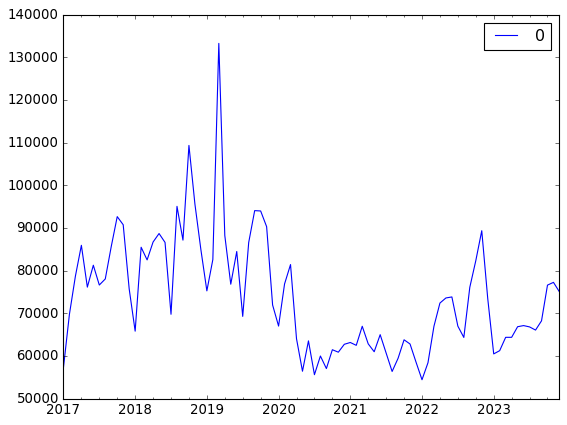

In [169]:
completo.plot()

In [170]:
completo.std()

0    13632.19787
dtype: float64

In [171]:
completo.mean()

0    73908.437821
dtype: float64

In [172]:
future_w_features["pred"].sum()

814215.75

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [174]:
datos_OLS = pd.DataFrame()
datos_OLS["HH_Anual"] = [completo[0].loc["2017-01-31":"2017-12-31"].sum(),
                        completo[0].loc["2018-01-31":"2018-12-31"].sum(),
                        completo[0].loc["2019-01-31":"2019-12-31"].sum(),
                        completo[0].loc["2020-01-31":"2020-12-31"].sum(),
                        completo[0].loc["2021-01-31":"2021-12-31"].sum(),
                        completo[0].loc["2022-01-31":"2022-12-31"].sum()]
datos_OLS["Tiempo"] = [1,2,3,4,5,6]

In [175]:
# Define la variable dependiente 
y = datos_OLS['HH_Anual']

# Define la variable explicativa 
x = datos_OLS['Tiempo']

# Se agrega la variable constante
x = sm.add_constant(x)

# Se realiza la regresion como tal 
model = sm.OLS(y, x).fit()

# Se imprime los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               HH_Anual   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     3.170
Date:                Wed, 27 Dec 2023   Prob (F-statistic):              0.150
Time:                        17:49:38   Log-Likelihood:                -76.970
No. Observations:                   6   AIC:                             157.9
Df Residuals:                       4   BIC:                             157.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.064e+06   1.03e+05     10.344      0.0

In [176]:
predicciones_lineales = model.fittedvalues

In [177]:
predicciones_lineales

0    1.016521e+06
1    9.695188e+05
2    9.225166e+05
3    8.755144e+05
4    8.285122e+05
5    7.815100e+05
dtype: float64

In [178]:
prediccion_lineal =  1.064e+06 + -4.7e+04*7

In [179]:
predicciones_lineales

0    1.016521e+06
1    9.695188e+05
2    9.225166e+05
3    8.755144e+05
4    8.285122e+05
5    7.815100e+05
dtype: float64

In [180]:
prediccion_lineal

735000.0

In [181]:
fitted_lineales = [1.016521e+06,9.695188e+05,9.225166e+05,8.755144e+05,8.285122e+05,7.815100e+05]

In [182]:
datos_OLS["fitted_lineales"] = fitted_lineales

<Axes: >

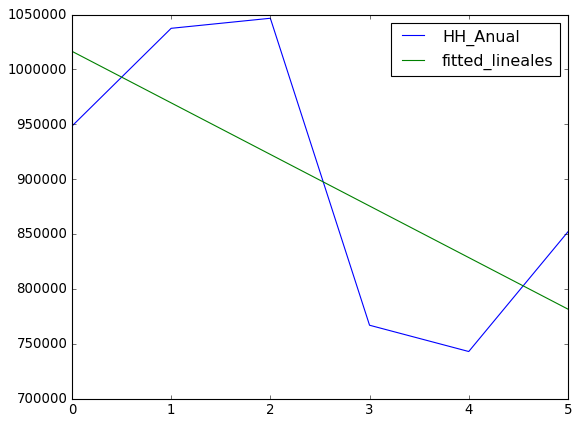

In [183]:
datos_OLS[["HH_Anual", "fitted_lineales"]] .plot()

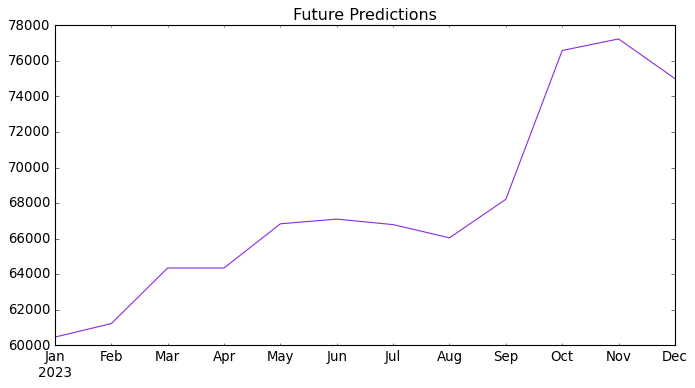

In [196]:
future_w_features['pred'].plot(figsize=(10, 5),
                               color="blueviolet",
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()


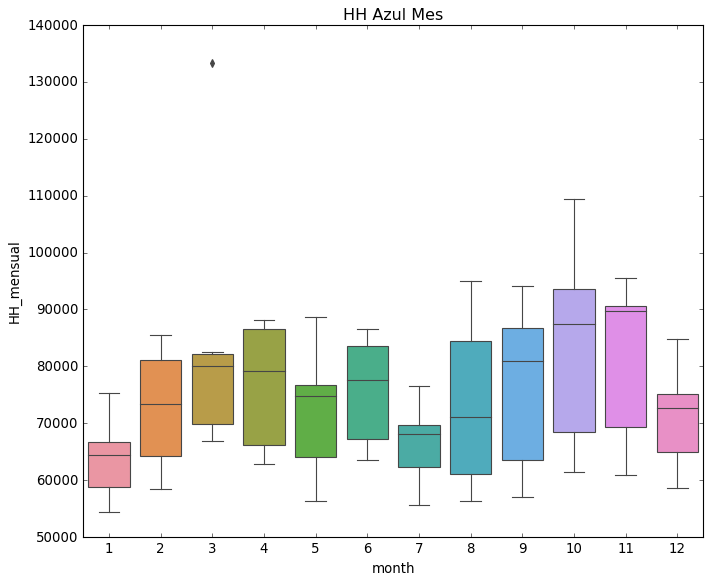

In [184]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_and_future, x='month', y='HH_mensual')
ax.set_title('HH Azul Mes')
plt.show()

In [185]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [186]:
# Calcular el MSE
mse = mean_squared_error(train['HH_mensual'], train['prediction'])

# Calcular el RMSE
rmse = np.sqrt(mse)

print(f'RMSE Train: {rmse}')

RMSE Train: 2834.520993228553


In [187]:
# Calcular el MSE
mse = mean_squared_error(test['HH_mensual'], test['prediction'])

# Calcular el RMSE
rmse = np.sqrt(mse)

print(f'RMSE Test: {rmse}')

RMSE Test: 3432.21208905509


In [188]:
1
def theil_u(y_reales, y_predichos):
    """
    Calcula el índice de Theil U para series de tiempo.

    Parameters:
    - y_reales: Lista o array de los valores reales.
    - y_predichos: Lista o array de los valores predichos.

    Returns:
    - theil_u: El índice de Theil U.
    """
    # Calcular las proporciones de error cuadrático
    errores_cuadraticos = (y_predichos - y_reales)**2
    errores_cuadraticos_medios_reales = (y_reales**2).mean()

    # Calcular el índice de Theil U
    theil_u = np.sqrt(errores_cuadraticos.mean() / errores_cuadraticos_medios_reales)

    return theil_u


In [189]:
theil_u(train['HH_mensual'], train['prediction'])

0.03649939142906122

In [190]:
theil_u(test['HH_mensual'], test['prediction'])

0.04793741160840897